<a href="https://colab.research.google.com/github/lhbsaldana/Data-Science-Projects/blob/main/%5BML%5D_Saldana_Finals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What is Association Rule Mining


<p> 

*   also known as Market Basket Analysis 
*   Help discover relationships between independent relational databases
*   ARM is primarily used in retail (recommendation system) 

To simplify, the logic behind the association rule mining is if two/more items are frequently bought together, these items can be recommended to the customer when he buys one of these items  

Source: https://towardsdatascience.com/association-rules-2-aa9a77241654 
</p>

### ECLAT Algorithm


<p> 
Equivalence Class Clustering and Bottom-up Lattice Traversal Algorithm (ECLAT) 

Pros: 

*   faster than Apriori Algorithm 
*   uses depth-first search approach to discover association rules 
*   consumes less memory 

Cons: 
*   only uses support as its metrics for evaluating strength of association rule

</p> 

Source: https://towardsdatascience.com/the-eclat-algorithm-8ae3276d2d17

##Import dataset and necessary modules


In [ ]:
import pandas as pd
!pip install pyECLAT
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dir_name = '/content/drive/MyDrive/Colab Notebooks/'
dataset = pd.read_csv(f"{dir_name}Groceries data.csv")
dataset.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


##EDA 

In [ ]:
dataset.shape

(38765, 7)

In [ ]:
dataset.info() #outputs the column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [ ]:
dataset.describe()

,Member_number,year,month,day,day_of_week
count,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000
mean,3003.641868,2014.528518,6.477570,15.753231,3.014498
std,1153.611031,0.499193,3.431561,8.801391,1.987669
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,2002.000000,2014.000000,4.000000,8.000000,1.000000
50%,3005.000000,2015.000000,6.000000,16.000000,3.000000
75%,4007.000000,2015.000000,9.000000,23.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


In [ ]:
year = dataset['year'].value_counts()
year

2015    20488
2014    18277
Name: year, dtype: int64

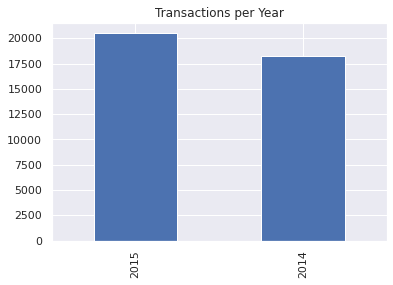

In [ ]:
year.plot(kind="bar")
plt.title('Transactions per Year')
plt.show()

In [ ]:
dataset['itemDescription'].nunique() #the store contains 167 products

167

In [ ]:
top10= dataset['itemDescription'].value_counts().head(10)
top10

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

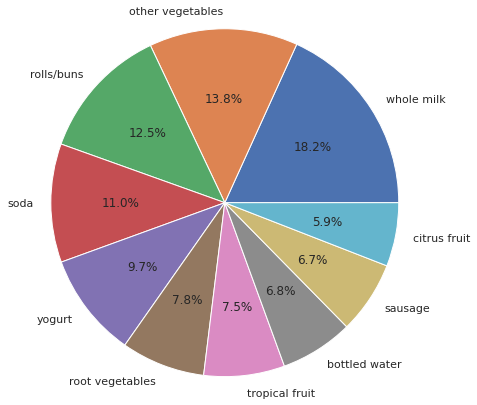

In [ ]:
#displays the top 10 most sellable items that appears in dataset 
top10.plot(kind="pie",autopct='%1.1f%%',radius=2)

In [ ]:
dataset.isna().sum() #displays the count of NaN values for each column 

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

###Pre-processing

In [ ]:
dataset['date'] = pd.to_datetime(dataset[['year', 'month', 'day']])
dataset

,Member_number,Date,itemDescription,year,month,day,day_of_week,date
0,1808,2015-07-21,tropical fruit,2015,7,21,1,2015-07-21
1,2552,2015-05-01,whole milk,2015,5,1,4,2015-05-01
2,2300,2015-09-19,pip fruit,2015,9,19,5,2015-09-19
3,1187,2015-12-12,other vegetables,2015,12,12,5,2015-12-12
4,3037,2015-01-02,whole milk,2015,1,2,4,2015-01-02
...,...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6,2014-08-10
38761,2022,2014-02-23,candy,2014,2,23,6,2014-02-23
38762,1097,2014-04-16,cake bar,2014,4,16,2,2014-04-16
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2,2014-03-12


In [ ]:
#.zip() pairs up member_number and date (1 transaction) and puts them in a list 
dataset['member_date'] = list(zip(dataset['Member_number'],dataset['date'].dt.date))
dataset['quantity'] = 1 
dataset

,Member_number,Date,itemDescription,year,month,day,day_of_week,date,member_date,quantity
0,1808,2015-07-21,tropical fruit,2015,7,21,1,2015-07-21,"(1808, 2015-07-21)",1
1,2552,2015-05-01,whole milk,2015,5,1,4,2015-05-01,"(2552, 2015-05-01)",1
2,2300,2015-09-19,pip fruit,2015,9,19,5,2015-09-19,"(2300, 2015-09-19)",1
3,1187,2015-12-12,other vegetables,2015,12,12,5,2015-12-12,"(1187, 2015-12-12)",1
4,3037,2015-01-02,whole milk,2015,1,2,4,2015-01-02,"(3037, 2015-01-02)",1
...,...,...,...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6,2014-08-10,"(4471, 2014-08-10)",1
38761,2022,2014-02-23,candy,2014,2,23,6,2014-02-23,"(2022, 2014-02-23)",1
38762,1097,2014-04-16,cake bar,2014,4,16,2,2014-04-16,"(1097, 2014-04-16)",1
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2,2014-03-12,"(1510, 2014-03-12)",1


<p>
A purchase is defined by a combination of ID and date of purchase. The zip() does this pairing because it groups a member ID with his/her date of purchase. The pair is then converted into a list.

The new column named quantity implies that each row in the dataset contains 1 item purchased by a customer.

</p>

In [ ]:
transactions = dataset.groupby('member_date')['itemDescription'].aggregate(lambda x: ','.join(list(x))).reset_index()
transactions.head()

,member_date,itemDescription
0,"(1000, 2014-06-24)","whole milk,pastry,salty snack"
1,"(1000, 2015-03-15)","sausage,whole milk,semi-finished bread,yogurt"
2,"(1000, 2015-05-27)","soda,pickled vegetables"
3,"(1000, 2015-07-24)","canned beer,misc. beverages"
4,"(1000, 2015-11-25)","sausage,hygiene articles"


<p> The output above refers to the items bought by a customer on a specific date. For each transaction, the items purchased by that customer is joined by commas. So, we see the list of products for each transaction in the itemDescription column. Through this, redundancy is avoided and the number of rows is reduced to 14,963.

So, for row one, customer with ID 1000, bought 3 items (pastry, salty snack, and a whole milk) last June 24,2014.
</p>

In [ ]:
basket = pd.DataFrame(transactions['itemDescription'].to_list())
basket = basket[0].str.split(',', expand=True)
basket

,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,None,None,None,None,None,None,None,None
1,sausage,whole milk,semi-finished bread,yogurt,None,None,None,None,None,None,None
2,soda,pickled vegetables,None,None,None,None,None,None,None,None,None
3,canned beer,misc. beverages,None,None,None,None,None,None,None,None,None
4,sausage,hygiene articles,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
14958,butter milk,whipped/sour cream,None,None,None,None,None,None,None,None,None
14959,bottled water,herbs,None,None,None,None,None,None,None,None,None
14960,fruit/vegetable juice,onions,None,None,None,None,None,None,None,None,None
14961,bottled beer,other vegetables,None,None,None,None,None,None,None,None,None


<p>The basket dataframe is a more 
expanded visualization of the items bought by each customer on a specific date. 

</p>

##Implementation of ECLAT Algorithm

In [ ]:
from pyECLAT import ECLAT 
dataEclat = ECLAT(data=basket,verbose=True)

100%|██████████| 168/168 [00:00<00:00, 2635.14it/s]


In [ ]:
dataEclat.df_bin

,grapes,yogurt,specialty fat,skin care,sparkling wine,bathroom cleaner,specialty chocolate,photo/film,rolls/buns,bottled beer,...,brown bread,liquor,seasonal products,potato products,pet care,berries,make up remover,salt,dishes,liqueur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<p>Dataframe of binary values. 1 means it is included in the transaction, 0 means it's not included. This is analogous to the bag of words approach in Naive Bayes Classifier. 

</p>

####Parameters for the ECLAT Algorithm 

<p> 

*   Minimum support – percentage of the overall items from the dataset
*   Minumum combinations – the minimum amount of items in the transaction 
*  Maximum combinations – the maximum amount of items in the transaction





</p>

In [ ]:
min_supp = 7/len(dataset) #the item should appear at least 7% in the dataset
min_combi = 2 #for each rule, we want it to have at least 2 items
max_combi = 2 #for each rule, we want it to have at most 2 items 

In [ ]:
rule_indices, rule_supports = dataEclat.fit(min_support=min_supp,
                                                 min_combination=min_combi,
                                                 max_combination=max_combi,
                                                 separator=' & ')


Combination 2 by 2


13530it [02:55, 77.02it/s]


In [ ]:
result = pd.DataFrame(rule_supports.items(),columns=['Item', 'Support'])
result.sort_values(by=['Support'],ascending = False)

,Item,Support
1851,other vegetables & whole milk,0.014837
288,rolls/buns & whole milk,0.013968
1991,whole milk & soda,0.011629
90,yogurt & whole milk,0.011161
286,rolls/buns & other vegetables,0.010559
...,...,...
2279,hygiene articles & white wine,0.000200
436,bottled beer & finished products,0.000200
990,napkins & dishes,0.000200
2286,hygiene articles & liquor,0.000200


<p> The results above displays the association rules generated from the ECLAT Algorithm sorted from least support value to greatest. The total generated rules are 2,880. </p> 

In [ ]:
item_df = pd.DataFrame(result['Item'].to_list())
item_df[['Antecedents', 'Consequents']]=item_df[0].str.split('&', expand=True)
supp_series= pd.Series(result['Support'])
fin_results = pd.concat([item_df,supp_series],axis=1)
fin_results.rename(columns={ fin_results.columns[0]: "Itemsets" }, inplace = True)

fin_results.sort_values(by=['Support'],ascending = False)

,Itemsets,Antecedents,Consequents,Support
1851,other vegetables & whole milk,other vegetables,whole milk,0.014837
288,rolls/buns & whole milk,rolls/buns,whole milk,0.013968
1991,whole milk & soda,whole milk,soda,0.011629
90,yogurt & whole milk,yogurt,whole milk,0.011161
286,rolls/buns & other vegetables,rolls/buns,other vegetables,0.010559
...,...,...,...,...
2279,hygiene articles & white wine,hygiene articles,white wine,0.000200
436,bottled beer & finished products,bottled beer,finished products,0.000200
990,napkins & dishes,napkins,dishes,0.000200
2286,hygiene articles & liquor,hygiene articles,liquor,0.000200


<p> The results above displays the association rules with labels antecedents and consequents for each association rule.</p> 

###Using instant food products as example 

In [ ]:
rules_instant= fin_results[fin_results["Antecedents"].apply(lambda x: "Instant food products" in x)]
rules_instant.sort_values('Support', ascending=False)

,Itemsets,Antecedents,Consequents,Support
2625,Instant food products & soda,Instant food products,soda,0.000267
2626,Instant food products & whipped/sour cream,Instant food products,whipped/sour cream,0.000267
2627,Instant food products & pastry,Instant food products,pastry,0.000200
2628,Instant food products & citrus fruit,Instant food products,citrus fruit,0.000200


<p>Since we have a lot of association rules generated for each product, it is a bit challenging to decide which items should be put together with that product. Hence, we just want to determine what are the top items that are frequently brought together with a product. Let us use instant foods as an example. 
 </p> 

In [ ]:
rules_support = rules_instant[rules_instant['Support'] >= rules_instant['Support'].quantile(q = 0.90)]
rules_support

,Itemsets,Antecedents,Consequents,Support
2625,Instant food products & soda,Instant food products,soda,0.000267
2626,Instant food products & whipped/sour cream,Instant food products,whipped/sour cream,0.000267


<p> 
The results above show the items that belong in the top 10 percentile. This implies that soda and whipped/sour cream are the most popular items that customers would buy together with instant food products. 
</p> 

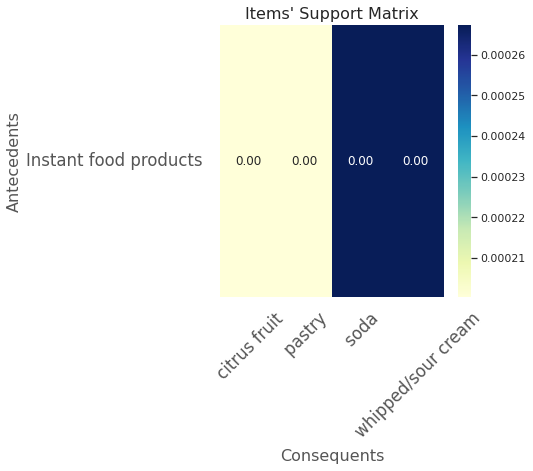

In [ ]:
import seaborn as sns

pivot_support = rules_instant.pivot(index='Antecedents', columns='Consequents', values='Support')

sns.set_context("talk")
plt.style.use('ggplot')
plt.subplots(figsize=(5,5))
sns.set()
ax = sns.heatmap(data=pivot_support, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title("Items' Support Matrix", fontsize=16, y=1.02)
ax.set_xlabel("Consequents",fontsize=16)
ax.set_ylabel("Antecedents",fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show() 

<p> 
The illustration above shows that instant food products are popular to be purchased with whipped/sour cream and soda. 

The graph suggests that the store can make promos such as discounts on whipped/sour cream and soda when the customer buys an instant food product. In addition, the store can have buy 2 instant food products to get a free one packet of whipped/sour cream  or a free bundle of assorted vegetables. 

Through this analysis, the store can quickly offload inventory and hit sales targets faster by the end of the month or quarter. This can also help increase positive reviews because of free product offerings and attract new customers because the store has complimentary deals for a discounted price. 

</p> 

References: 

*   Ganiyu, I. S. (2022, May 24). Market Basket Analysis in Data Mining Simplified 101 - Learn | Hevo. Hevo. https://hevodata.com/learn/market-basket-analysis-in-data-mining/#algoGarg

* A. (2018, September 3). Complete guide to Association Rules (1/2). Towards Data Science; Towards Data Science. https://towardsdatascience.com/association-rules-2-aa9a77241654

* Korstanje, J. (2021, September 29). The Eclat algorithm. Medium. https://towardsdatascience.com/the-eclat-algorithm-8ae3276d2d17

* Malik, U. (2018, August 9). Association Rule Mining via Apriori Algorithm in Python. Stack Abuse; Stack Abuse. https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/

* Xavier. (n.d.). Market Basket Analysis. Kaggle.com. https://www.kaggle.com/code/xvivancos/market-basket-analysis/report


